In [1]:
import torch
from pathlib import Path
import os
from sklearn.metrics import r2_score
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter
from Model_simple import *
from Unet_model import *
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import normalized_root_mse as nrmse
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
import scipy.stats as st

In [2]:
device = torch.device('cuda')
test_model_24_p = InceptionLSTM(3, 1, 128, 60, 0.3).float().to(device)
test_model_24_p.load_state_dict(torch.load(f'model_weights_10.25-22.21_p@85.pth', map_location=device))    # [notice] match !!
test_model_24_p.eval()
print('done')

done


In [33]:
def infer_show(ax_to_plot, ccc, ts, v_min, v_max, feature_num):
    input_tensor = torch.load(f'tttt_train_p_x\\{ccc:>04}.pt').to(device).squeeze()
    _, hidden = test_model_24_p(input_tensor.float().unsqueeze(0), )
    hidden_list = []
    for i in range(len(hidden)):
        hidden_list.append(hidden[i][0])    # get h
    curr_hidden = hidden_list[ts].squeeze()[feature_num, :, :]
    # print(curr_hidden.shape)
    curr_hidden = curr_hidden.detach().cpu().squeeze()
    pcm = ax_to_plot.imshow(curr_hidden, cmap='plasma', vmin=v_min, vmax=v_max)
    ax_to_plot.set_xlabel(f'{ts}', fontsize=10)
    if ts == 0:
        ax_to_plot.set_ylabel('Pressure', fontsize=10)
    return pcm

In [5]:
device = torch.device('cuda')
test_model_24_s = InceptionLSTM(3, 1, 128, 60, 0.3).float().to(device)
test_model_24_s.load_state_dict(torch.load(f'model_weights_10.30-15.28_s@84.pth', map_location=device))    # [notice] match !!
test_model_24_s.eval()
print('done')

done


In [34]:
def infer_show_s(ax_to_plot, ccc, ts, v_min, v_max, feature_num):
    input_tensor = torch.load(f'tttt_train_s_x\\{ccc:>04}.pt').to(device).squeeze()
    _, hidden = test_model_24_s(input_tensor.float().unsqueeze(0), )
    hidden_list = []
    for i in range(len(hidden)):
        hidden_list.append(hidden[i][0])    # get h
    curr_hidden = hidden_list[ts].squeeze()[feature_num, :, :]
    # print(curr_hidden.shape)
    curr_hidden = curr_hidden.detach().cpu().squeeze()
    pcm = ax_to_plot.imshow(curr_hidden, cmap='plasma', vmin=v_min, vmax=v_max)
    ax_to_plot.set_xlabel(f'{ts}', fontsize=10)
    if ts == 0:
        ax_to_plot.set_ylabel('Saturation', fontsize=10)
    return pcm

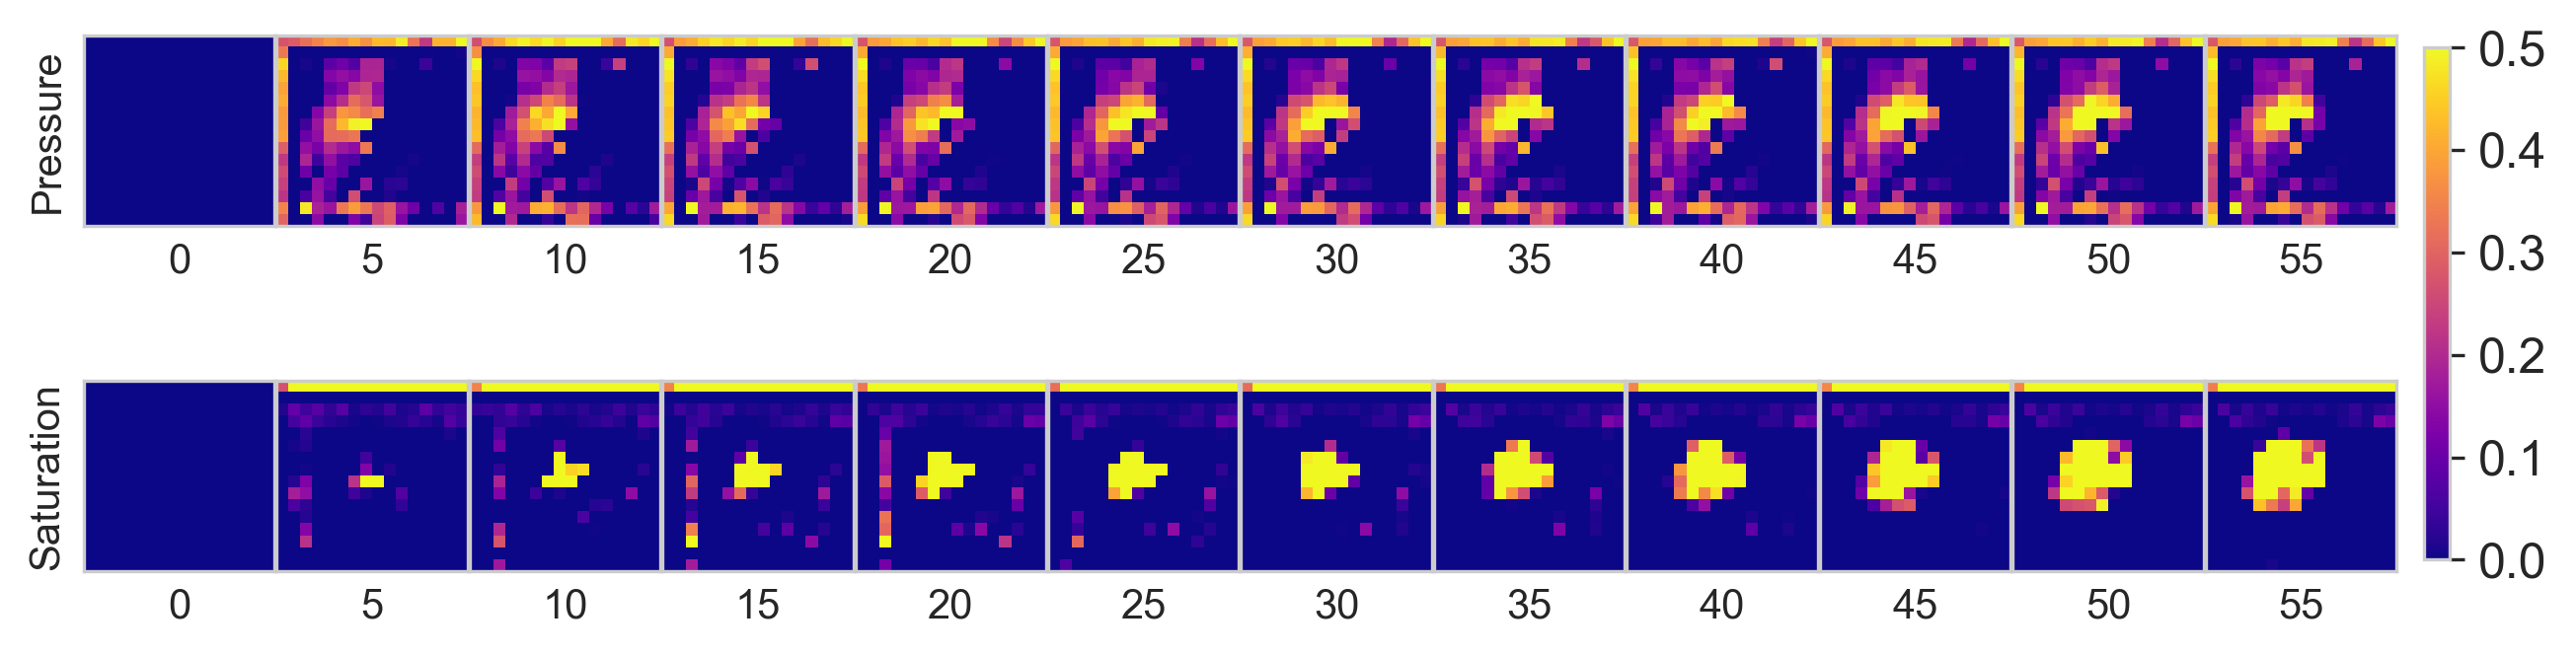

In [35]:
fig, axs = plt.subplots(2, 12, figsize=(12, 3), dpi=300)
plt.subplots_adjust(
    wspace=0.01,
    hspace=0.02,
    
)
for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

# 5080 good
case_num = 5080
v1_min = 0
v1_max = 0.5
# 7
for i in range(12):
    plotting = infer_show(axs[0, i], case_num, i*5, v1_min, v1_max, 55)
    _ = infer_show_s(axs[1, i], case_num, i*5, v1_min, v1_max, 7)
cbar1 = fig.colorbar(plotting, ax=axs, pad=0.01, shrink=0.75)
cbar1.ax.tick_params(labelsize=12)
cbar1.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
plt.savefig('chutu\\hiddens.tiff', dpi=1000, bbox_inches='tight', pad_inches=0.1)